<a href="https://colab.research.google.com/github/masonnystrom/DS-Unit-2-Kaggle-Challenge/blob/master/Mason_Unit_2_Sprint_2_Tree_Ensembles_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources

[Category Encoders](https://contrib.scikit-learn.org/categorical-encoding/)

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Hyperparameter Tuning](https://scikit-learn.org/stable/modules/grid_search.html)

[Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

[Scoring Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

Students will build one classification model for one provided dataset. (Not two like last week.)
*1. Begin with baselines for classification.* What is your baseline accuracy, if you guessed the majority class for every prediction?
*2. Hold out your test set. (Time-based)*
*3. Engineer new feature.* Engineer at least 1 new feature, from a provided list, or your own idea.
*4. Decide how to validate your model.* Choose one of the following options. Any of these options are good. You are not graded on which you choose.
- *Train/validate/test split: time-based*
- *Train/validate/test split: random 80/20%* train/validate split.
- *Cross-validation* with independent test set. You may use any scikit-learn cross-validation method.
*5.* Use a scikit-learn *pipeline* to *encode categoricals* and fit a *Decision Tree* or *Random Forest* model.
*6.* Get your model’s *validation accuracy.* (Multiple times if you try multiple iterations.)
*7.* Get your model’s *test accuracy.* (One time, at the end.)
*8.* Given a *confusion matrix* for a hypothetical binary classification model, *calculate accuracy, precision,

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Use the dataframe below for all questions unless otherwise stated

# Basics and Data Preparation

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Logistic Regression:** `A model to evaluate the relationship between a binary dependent variable and other nominal or ordinal independent variables.`

**Imbalanced Classes:** `A problem where the training dataset has a class distribution that is not equal or close to equal. This makes the dataset biased or skewed which effects your accuracy.`

**Leakage:** `information from outside the training dataset is used to create the model. One example could be knowing the end results, like in stock backtesting, and forgetting to remove any future identifier. Another exmaple could be try to predict if someone from a homeless shelter recieves a job and using information that is collected after someone has left the shelter. `

**Categorical Encoding:** `A labeling technique `

**Skew:** `Refers to the asymmetry in you data's distribution. Skewness will effect your model by include lots of values that are not refelctive of the mean or normal distribution of your data.`

**Log Transformation:** `Your Answer Here`

**Outliers:** `outliers are datapoints that skew or alter the distribution of the data that should be removed.`

Answer the following questions in plain english as much as possible.
<br/><br/>

What are some ways to deal with imbalanced classes?
```
Some ways to deal with imbalanced classes include resampleing the training set, using K-fold cross-validation, and using tree based models. 
```

What are some possible sources of data leakage?
```
Data-leakage is when a ML model accidentally shares information between the test and training data-sets. This can happen from by randomizing series data, retaining proxies for removed variables, reversing any obfuscated data, or from including information outside of what is typically collected. It can be reduced by using temporal cutoffs for times series data, removing variables that may provide future information, and by using pipelines to process data. 
```

What are some indicators or methods for detecting data leakage?
```
Your Answer Here
```

What is the relationship between skew and log transformation?
```
A logarithmic transformation scales a particular distribution that reduces the skewness. 
```

Using the dataset above, complete the following:
- Train/Test/Validation Split
- Get a baseline
- Perform EDA with visuals
- Clean up any nulls, duplicate columns, or outliers you might find
- Engineer at least 2 features
- Use One Hot or Ordinal Encoding on one feature

In [113]:
# https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/hearts.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,Male,D,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,Male,C,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,Female,B,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,Male,B,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,Female,A,120,354,0,1,163,1,0.6,2,0,2,1


In [153]:
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [114]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=.8, test_size=.2, random_state=42)
train.shape, test.shape

((242, 15), (61, 15))

In [0]:
# if years and need subsetting
# test = df[df['SALE_DATE'] >= '04/01/2019']
# train = df[df['SALE_DATE'] < '04/01/2019']


In [115]:
train, val = train_test_split(train, train_size=.8, test_size=.2, random_state=42)
train.shape, val.shape

((193, 15), (49, 15))

In [116]:
train.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
225,225,70,Male,A,145,174,0,1,125,1,2.6,0,0,3,0
88,88,54,Female,C,110,214,0,1,158,0,1.6,1,0,2,1
267,267,49,Male,C,118,149,0,0,126,0,0.8,2,3,2,0
36,36,54,Female,C,135,304,1,1,170,0,0.0,2,0,2,1
147,147,60,Female,D,150,240,0,1,171,0,0.9,2,0,2,1


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


In [118]:
!pip install --upgrade category_encoders

import category_encoders as ce

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [0]:
# wrangle function
def wrangle(X):
  X = X.copy()

  # drop unusable columns
  unusable_variance = ['Unnamed: 0']
  X = X.drop(columns=unusable_variance)


  #engineer new features 
  X['hr/bps'] = (X['thalach'] / X['trestbps'])
  X['above_150'] = (X['thalach'] > 150)

  return X

In [0]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
target = 'target'

X_train = train.drop(columns = target)
y_train = train[target]

X_val = val.drop(columns = target)
y_val = val[target]

X_test = test.drop(columns = target)
y_test = test[target]

In [123]:
# baseline
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5647668393782384

In [0]:
# baseline
# target = 'target'
# y_train = train[target]

# # Mean baseline
# mean = y_train.mean()
# y_pred = [mean] * len(y_train)
# from sklearn.metrics import mean_absolute_error
# mae = mean_absolute_error(y_train, y_pred)
# mae

In [125]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hr/bps', 'above_150'],
      dtype='object')

In [0]:
# early data analysis 
# import plotly.express as px
# px.scatter(train, 'thalach', 'age', color='target')

In [0]:
# px.scatter(train, 'slope', 'chol', color='target')

In [0]:
# px.bar(train, 'age', 'trestbps')

# Model Building

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Decision Tree:** `A decision trees works by splitting data based on the features.`

**Random Forest** `A rf model uses bagging to achieve the majority vote of the indiivdual trees. Decision trees are prone to overfitting which is why a rf is used.` 

**Ensemble Methods (Ensemble Models):** `Your Answer Here`

**Gradient Descent:** `Your Answer Here`

**Bagging:** `Bagging is an ensemble algorithm method that decreased variance in the prediciton by generating additional data fro trainging by using combinations with repetitions to produce multiple sets of original dta. `

**Boosting:** `A technique that adjusts the weight of an observation based on the last classification.`

**Hyperparameters:** `Your Answer Here`

Build a random forest classifier using the dataset you cleaned and prepped above.

In [129]:
# make the pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=40, n_jobs=-1, max_features='auto', min_samples_leaf=3)
)
pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9326424870466321
Validation Accuracy: 0.7755102040816326


Graph your model's feature importances

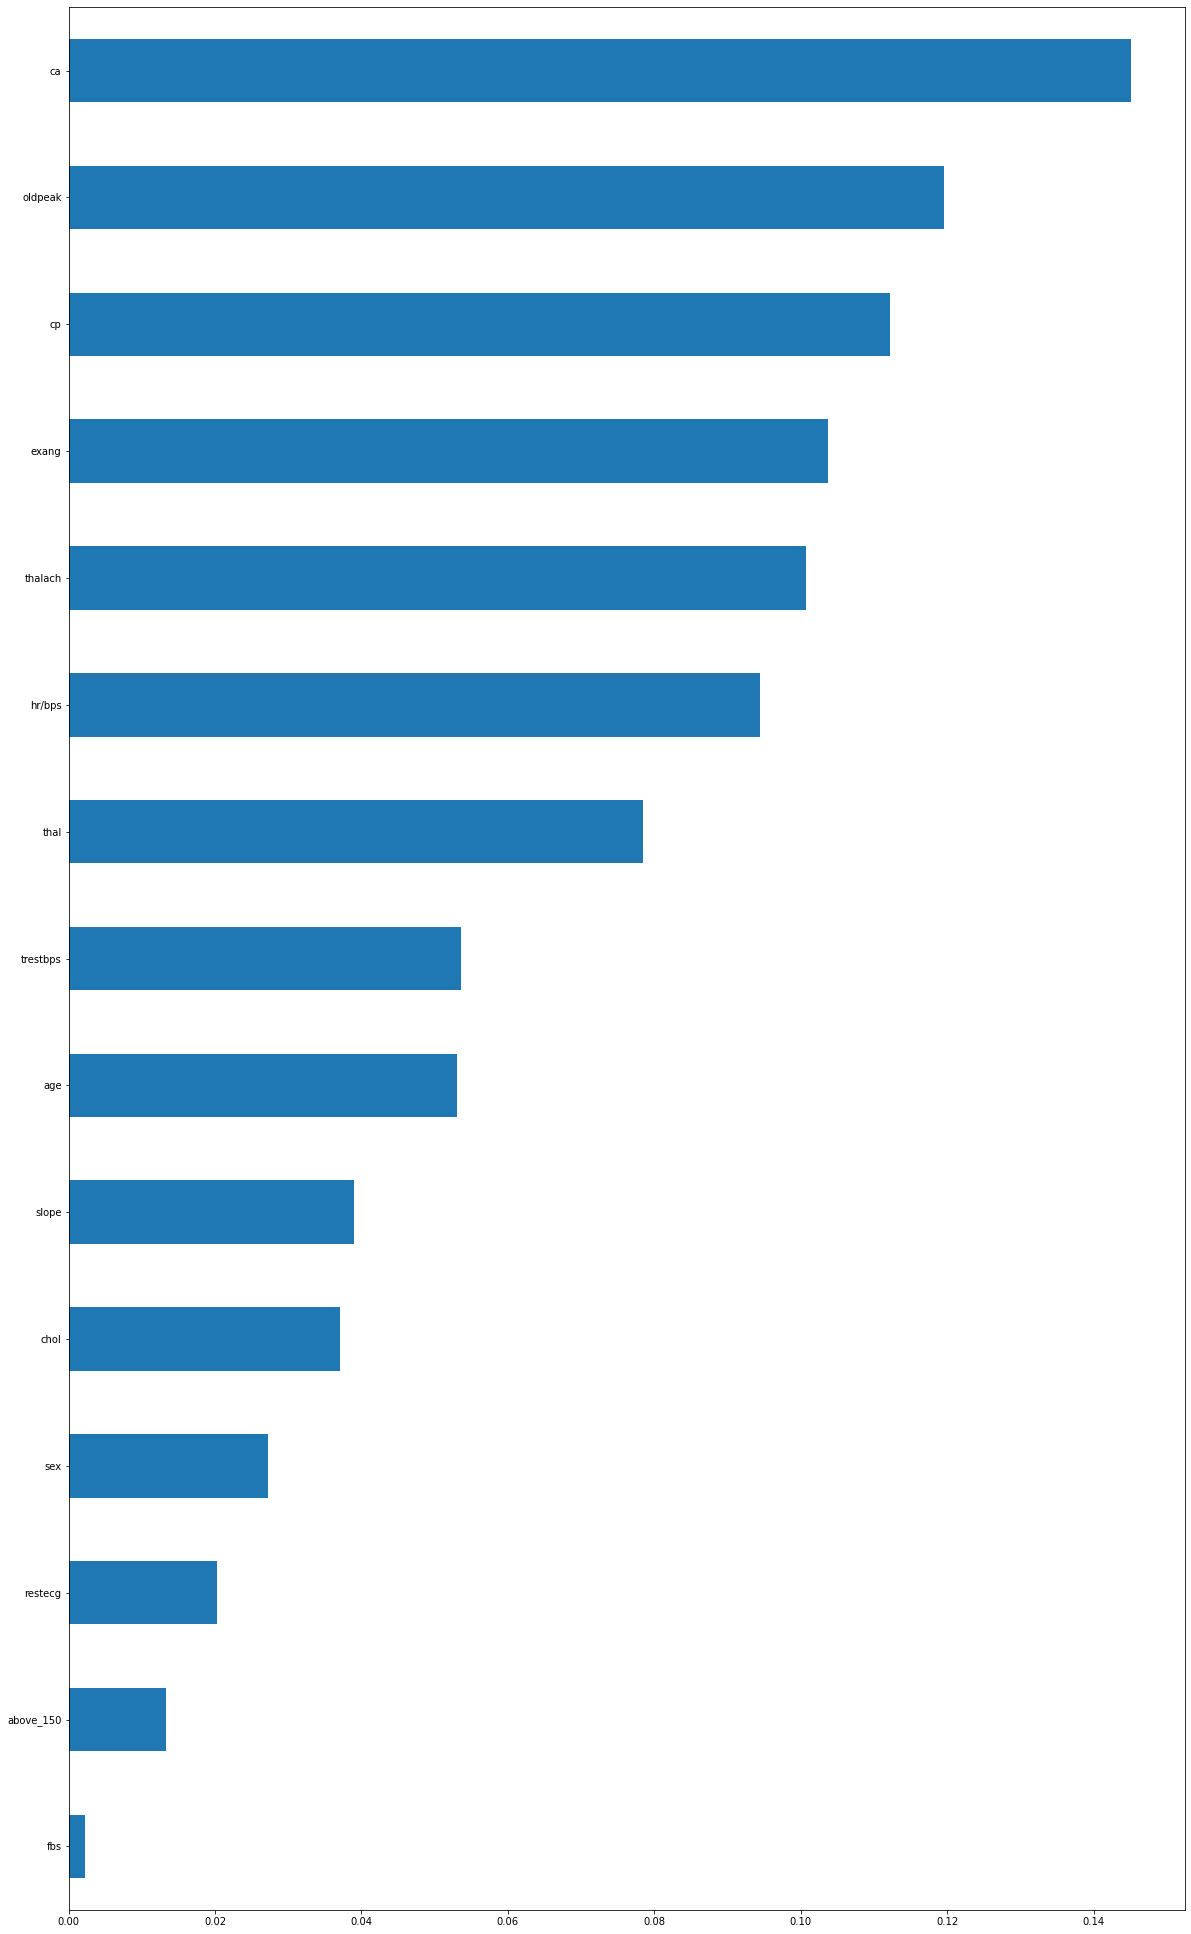

In [130]:
encoder = pipeline.named_steps['ordinalencoder']
model = pipeline.named_steps['randomforestclassifier']
imputer = pipeline.named_steps['simpleimputer']


encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(20,35))
importances.sort_values().plot.barh();


In 2-3 sentences, explain how to interpret and use the feature importances to further refine or help explain your model.

```
Ca and CP are the features that provide the best predictive power and are therefore the most important in our model as evaluated by the RandomForestClassifier model. 
```

How does feature importance differ from drop-column importances and permutation importances?

```
Drop-column importance drops a column entirely, retains the model and rescores the algorithm. 

Permuation importance randomly shuffles a single feature and waits until there is a decrease in the model score which breaks the relationship between the feature and the target. The drop in the model indicates how important the feature is. 
```

Build a logisitic regression model using the dataset you cleaned and prepped above.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
model = LogisticRegression()

In [0]:
log_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=1)
)

In [142]:
log_pipeline.fit(X_train, y_train)

print('Validation Accuracy', log_pipeline.score(X_val, y_val))

Validation Accuracy 0.7551020408163265


Plot the coefficients of your model.

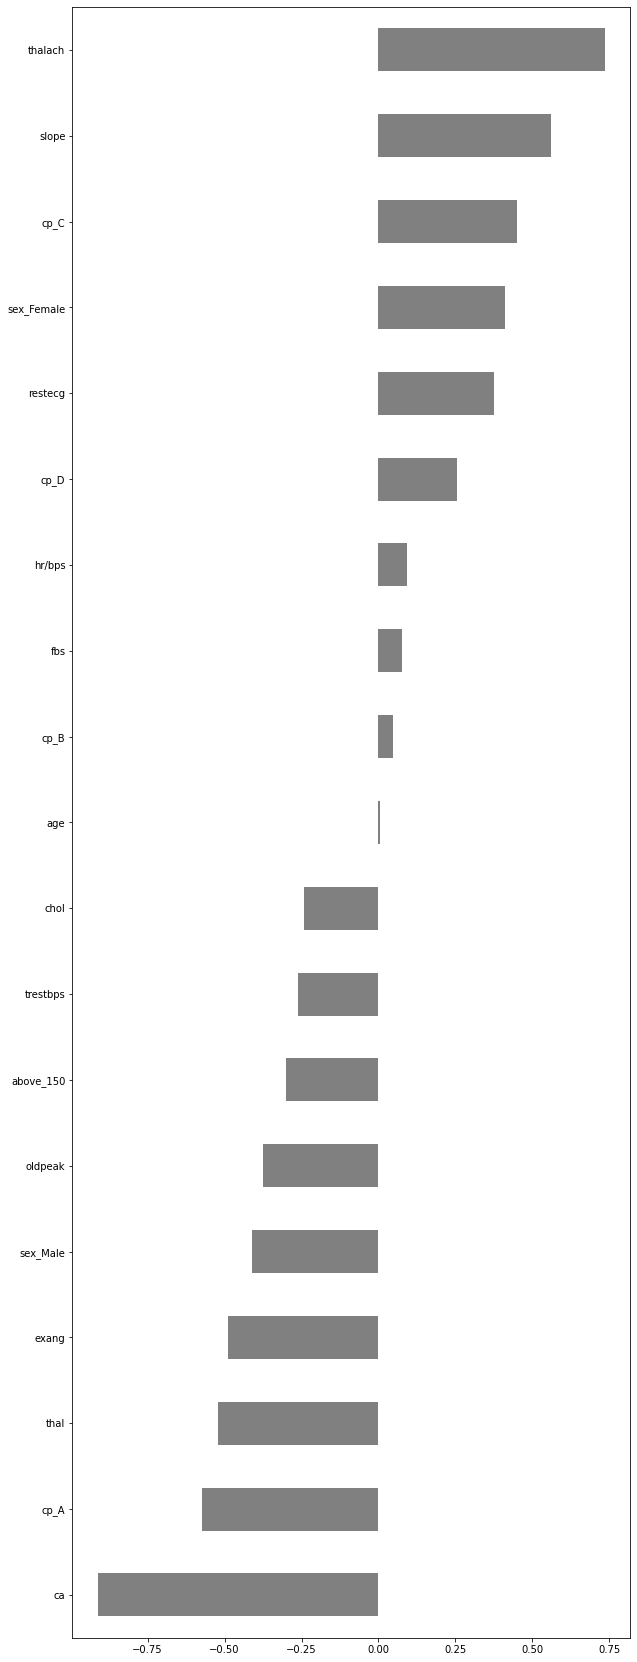

In [143]:
model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']

encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)

plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

In 2-3 sentences, explain how to interpret and use the coefficients to further refine or help explain your model.

```
Your Answer Here
```

What is an example of an ensemble method?

```
Bagging, ForestRegressionClassifier
```

What do we mean by hyperparameter tuning and how can we automate the tuning process?

```
Hyperparameters are manually set on a ML model in order to control the behavior of the model(often by introducing bias, variance, or other settings). 
```

# Metrics and Model Evaluation

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**ROC:** `curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings."`

**ROC-AUC:** ` the area under the ROC curve. ROC-AUC measures how well a classifier ranks predicted probabilities wihtout caring about the sample size. This a well-balanced evaluation of small datasets/sample sizes`

**Discrimination Threshold:** `Your Answer Here`

**Precision:** `the number of true positive out of all of our positives. also known as positive predicted value. .`

**Recall:** `The true positives out of our false negatives and true positives. Also known as sensitivity. Another way is that it is the fraction of total amount of relevant instances that were actually retrieved. Divide the true positives by the `

preceision and recall are the class level while accuracy is about all the classes. 

**F1 Score:** `Your Answer Here`

**Confusion Matrix:** `Your Answer Here`

Choose one of your models above to complete the following:
- Get your model's validation accuracy (This may be done multiple times if you are refining your model)
- Get your model's test accuracy
- Create a confusion matrix for your model
- Calculate the Accuracy, F1 Score, Precision, and Recall by hand
- Use SKLearn to calculate accuracy, F1 score, precision, and recall to confirm your work.

In [144]:
pipeline.score(X_val, y_val)

0.7551020408163265

In [145]:
pipeline.score(X_test, y_test)

0.8360655737704918

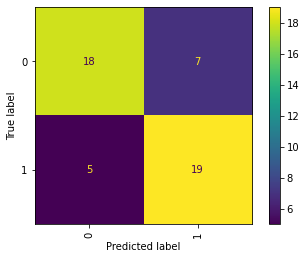

In [146]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_val, y_val, values_format='.0f', xticks_rotation='vertical');

In [147]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.73      0.79      0.76        24

    accuracy                           0.76        49
   macro avg       0.76      0.76      0.75        49
weighted avg       0.76      0.76      0.75        49



In [148]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Give an example of when we would use precision to score our model and explain why precision is the best metric for that situation.

```
Precision is more important when you want to reduce the false positive rate. This would be most useful for a large company looking to hire people because it's better to accept a few bad employees and not miss out on the great employees because you can always fire the bad employees after a few months with minimal harm. 
```

Give an example of when we would use recall to score our model and explain why recall is the best metric for that situation.

```
Recall is more important when you want to reduce the false negative reate. This is important in medical testing because you don't want to tell someone they dont' have a disease when they actually have it. 
```

Find your model's ROC-AUC Score

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve

In [0]:
# y_train = y_train != 'target'
# y_val = y_val != 'target'
# y_train.value_counts(normalize=True)

# y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

In [150]:
roc_auc_score(y_val, y_pred_proba)

0.8733333333333333

Plot your model's ROC Curve

Text(0, 0.5, 'True Positive Rate')

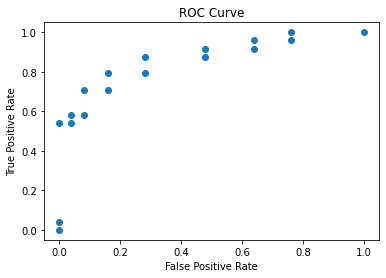

In [151]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
import matplotlib.pyplot as plt

plt.scatter(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')